<a href="https://colab.research.google.com/github/Buddha23-RGB/Breadth-analysis/blob/main/2_pair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quant Investments
www.quantinvests.com

In [ ]:
import datetime
from datetime import date, timedelta
print("Author  : Joe Chamoun")

today = datetime.date.today()
print ("Date   :", str(today))

print("Contact info: 403-589-3062")

print("Email: joe@quantinvests.com")
one_day = datetime.timedelta(days=1)

yesterday = today - one_day

tomorrow = today + one_day
!pip install fredapi
import fredapi
from fredapi import Fred

Author  : Joe Chamoun
Date   : 2022-01-18
Contact info: 403-589-3062
Email: joe@quantinvests.com


In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import warnings as __warnings
import sys as __sys
if not __sys.warnoptions:
    import os as __os
    __warnings.filterwarnings("default",category=DeprecationWarning,module='mpl_finance') # Change the filter in this process
    __os.environ["PYTHONWARNINGS"] = "default::DeprecationWarning:mpl_finance"            # Also affect subprocesses

__warnings.warn('\n\n  ================================================================='+
                '\n\n   WARNING: `mpl_finance` is deprecated:'+
                '\n\n    Please use `mplfinance` instead (no hyphen, no underscore).'+
                '\n\n    To install: `pip install --upgrade mplfinance` '+
                '\n\n   For more information, see: https://pypi.org/project/mplfinance/'
                '\n\n  =================================================================\n',
                category=DeprecationWarning)

import numpy as np
from matplotlib import colors as mcolors
from matplotlib.collections import LineCollection, PolyCollection
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D

from six.moves import xrange, zip


def plot_day_summary_oclh(ax, quotes, ticksize=3,
                          colorup='k', colordown='r'):
    """Plots day summary
        Represent the time, open, close, high, low as a vertical line
        ranging from low to high.  The left tick is the open and the right
        tick is the close.
    Parameters
    ----------
    ax : `Axes`
        an `Axes` instance to plot to
    quotes : sequence of (time, open, close, high, low, ...) sequences
        data to plot.  time must be in float date format - see date2num
    ticksize : int
        open/close tick marker in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    Returns
    -------
    lines : list
        list of tuples of the lines added (one tuple per quote)
    """
    return _plot_day_summary(ax, quotes, ticksize=ticksize,
                             colorup=colorup, colordown=colordown,
                             ochl=True)


def plot_day_summary_ohlc(ax, quotes, ticksize=3,
                          colorup='k', colordown='r'):
    """Plots day summary
        Represent the time, open, high, low, close as a vertical line
        ranging from low to high.  The left tick is the open and the right
        tick is the close.
    Parameters
    ----------
    ax : `Axes`
        an `Axes` instance to plot to
    quotes : sequence of (time, open, high, low, close, ...) sequences
        data to plot.  time must be in float date format - see date2num
    ticksize : int
        open/close tick marker in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    Returns
    -------
    lines : list
        list of tuples of the lines added (one tuple per quote)
    """
    return _plot_day_summary(ax, quotes, ticksize=ticksize,
                             colorup=colorup, colordown=colordown,
                             ochl=False)


def _plot_day_summary(ax, quotes, ticksize=3,
                      colorup='k', colordown='r',
                      ochl=True):
    """Plots day summary
        Represent the time, open, high, low, close as a vertical line
        ranging from low to high.  The left tick is the open and the right
        tick is the close.
    Parameters
    ----------
    ax : `Axes`
        an `Axes` instance to plot to
    quotes : sequence of quote sequences
        data to plot.  time must be in float date format - see date2num
        (time, open, high, low, close, ...) vs
        (time, open, close, high, low, ...)
        set by `ochl`
    ticksize : int
        open/close tick marker in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    ochl: bool
        argument to select between ochl and ohlc ordering of quotes
    Returns
    -------
    lines : list
        list of tuples of the lines added (one tuple per quote)
    """
    # unfortunately this has a different return type than plot_day_summary2_*
    lines = []
    for q in quotes:
        if ochl:
            t, open, close, high, low = q[:5]
        else:
            t, open, high, low, close = q[:5]

        if close >= open:
            color = colorup
        else:
            color = colordown

        vline = Line2D(xdata=(t, t), ydata=(low, high),
                       color=color,
                       antialiased=False,   # no need to antialias vert lines
                       )

        oline = Line2D(xdata=(t, t), ydata=(open, open),
                       color=color,
                       antialiased=False,
                       marker=TICKLEFT,
                       markersize=ticksize,
                       )

        cline = Line2D(xdata=(t, t), ydata=(close, close),
                       color=color,
                       antialiased=False,
                       markersize=ticksize,
                       marker=TICKRIGHT)

        lines.extend((vline, oline, cline))
        ax.add_line(vline)
        ax.add_line(oline)
        ax.add_line(cline)

    ax.autoscale_view()

    return lines


def candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r',
                     alpha=1.0):
    """
    Plot the time, open, close, high, low as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, close, high, low, ...) sequences
        As long as the first 5 elements are these values,
        the record can be as long as you want (e.g., it may store volume).
        time must be in float days format - see date2num
    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level
    Returns
    -------
    ret : tuple
        returns (lines, patches) where lines is a list of lines
        added and patches is a list of the rectangle patches added
    """
    return _candlestick(ax, quotes, width=width, colorup=colorup,
                        colordown=colordown,
                        alpha=alpha, ochl=True)


def candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r',
                     alpha=1.0):
    """
    Plot the time, open, high, low, close as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, high, low, close, ...) sequences
        As long as the first 5 elements are these values,
        the record can be as long as you want (e.g., it may store volume).
        time must be in float days format - see date2num
    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level
    Returns
    -------
    ret : tuple
        returns (lines, patches) where lines is a list of lines
        added and patches is a list of the rectangle patches added
    """
    return _candlestick(ax, quotes, width=width, colorup=colorup,
                        colordown=colordown,
                        alpha=alpha, ochl=False)


def _candlestick(ax, quotes, width=0.2, colorup='k', colordown='r',
                 alpha=1.0, ochl=True):
    """
    Plot the time, open, high, low, close as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of quote sequences
        data to plot.  time must be in float date format - see date2num
        (time, open, high, low, close, ...) vs
        (time, open, close, high, low, ...)
        set by `ochl`
    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level
    ochl: bool
        argument to select between ochl and ohlc ordering of quotes
    Returns
    -------
    ret : tuple
        returns (lines, patches) where lines is a list of lines
        added and patches is a list of the rectangle patches added
    """

    OFFSET = width / 2.0

    lines = []
    patches = []
    for q in quotes:
        if ochl:
            t, open, close, high, low = q[:5]
        else:
            t, open, high, low, close = q[:5]

        if close >= open:
            color = colorup
            lower = open
            height = close - open
        else:
            color = colordown
            lower = close
            height = open - close

        vline = Line2D(
            xdata=(t, t), ydata=(low, high),
            color=color,
            linewidth=0.5,
            antialiased=True,
        )

        rect = Rectangle(
            xy=(t - OFFSET, lower),
            width=width,
            height=height,
            facecolor=color,
            edgecolor=color,
        )
        rect.set_alpha(alpha)

        lines.append(vline)
        patches.append(rect)
        ax.add_line(vline)
        ax.add_patch(rect)
    ax.autoscale_view()

    return lines, patches


def _check_input(opens, closes, highs, lows, miss=-1):
    """Checks that *opens*, *highs*, *lows* and *closes* have the same length.
    NOTE: this code assumes if any value open, high, low, close is
    missing (*-1*) they all are missing
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    closes : sequence
        sequence of closing values
    miss : int
        identifier of the missing data
    Raises
    ------
    ValueError
        if the input sequences don't have the same length
    """

    def _missing(sequence, miss=-1):
        """Returns the index in *sequence* of the missing data, identified by
        *miss*
        Parameters
        ----------
        sequence :
            sequence to evaluate
        miss :
            identifier of the missing data
        Returns
        -------
        where_miss: numpy.ndarray
            indices of the missing data
        """
        return np.where(np.array(sequence) == miss)[0]

    same_length = len(opens) == len(highs) == len(lows) == len(closes)
    _missopens = _missing(opens)
    same_missing = ((_missopens == _missing(highs)).all() and
                    (_missopens == _missing(lows)).all() and
                    (_missopens == _missing(closes)).all())

    if not (same_length and same_missing):
        msg = ("*opens*, *highs*, *lows* and *closes* must have the same"
               " length. NOTE: this code assumes if any value open, high,"
               " low, close is missing (*-1*) they all must be missing.")
        raise ValueError(msg)


def plot_day_summary2_ochl(ax, opens, closes, highs, lows, ticksize=4,
                           colorup='k', colordown='r'):
    """Represent the time, open, close, high, low,  as a vertical line
    ranging from low to high.  The left tick is the open and the right
    tick is the close.
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    closes : sequence
        sequence of closing values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    ticksize : int
        size of open and close ticks in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
         the color of the lines where close <  open
    Returns
    -------
    ret : list
        a list of lines added to the axes
    """

    return plot_day_summary2_ohlc(ax, opens, highs, lows, closes, ticksize,
                                  colorup, colordown)


def plot_day_summary2_ohlc(ax, opens, highs, lows, closes, ticksize=4,
                           colorup='k', colordown='r'):
    """Represent the time, open, high, low, close as a vertical line
    ranging from low to high.  The left tick is the open and the right
    tick is the close.
    *opens*, *highs*, *lows* and *closes* must have the same length.
    NOTE: this code assumes if any value open, high, low, close is
    missing (*-1*) they all are missing
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    closes : sequence
        sequence of closing values
    ticksize : int
        size of open and close ticks in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
         the color of the lines where close <  open
    Returns
    -------
    ret : list
        a list of lines added to the axes
    """

    _check_input(opens, highs, lows, closes)

    rangeSegments = [((i, low), (i, high)) for i, low, high in
                     zip(xrange(len(lows)), lows, highs) if low != -1]

    # the ticks will be from ticksize to 0 in points at the origin and
    # we'll translate these to the i, close location
    openSegments = [((-ticksize, 0), (0, 0))]

    # the ticks will be from 0 to ticksize in points at the origin and
    # we'll translate these to the i, close location
    closeSegments = [((0, 0), (ticksize, 0))]

    offsetsOpen = [(i, open) for i, open in
                   zip(xrange(len(opens)), opens) if open != -1]

    offsetsClose = [(i, close) for i, close in
                    zip(xrange(len(closes)), closes) if close != -1]

    scale = ax.figure.dpi * (1.0 / 72.0)

    tickTransform = Affine2D().scale(scale, 0.0)

    colorup = mcolors.to_rgba(colorup)
    colordown = mcolors.to_rgba(colordown)
    colord = {True: colorup, False: colordown}
    colors = [colord[open < close] for open, close in
              zip(opens, closes) if open != -1 and close != -1]

    useAA = 0,   # use tuple here
    lw = 1,      # and here
    rangeCollection = LineCollection(rangeSegments,
                                     colors=colors,
                                     linewidths=lw,
                                     antialiaseds=useAA,
                                     )

    openCollection = LineCollection(openSegments,
                                    colors=colors,
                                    antialiaseds=useAA,
                                    linewidths=lw,
                                    offsets=offsetsOpen,
                                    transOffset=ax.transData,
                                    )
    openCollection.set_transform(tickTransform)

    closeCollection = LineCollection(closeSegments,
                                     colors=colors,
                                     antialiaseds=useAA,
                                     linewidths=lw,
                                     offsets=offsetsClose,
                                     transOffset=ax.transData,
                                     )
    closeCollection.set_transform(tickTransform)

    minpy, maxx = (0, len(rangeSegments))
    miny = min([low for low in lows if low != -1])
    maxy = max([high for high in highs if high != -1])
    corners = (minpy, miny), (maxx, maxy)
    ax.update_datalim(corners)
    ax.autoscale_view()

    # add these last
    ax.add_collection(rangeCollection)
    ax.add_collection(openCollection)
    ax.add_collection(closeCollection)
    return rangeCollection, openCollection, closeCollection


def candlestick2_ochl(ax, opens, closes, highs, lows, width=4,
                      colorup='k', colordown='r',
                      alpha=0.75):
    """Represent the open, close as a bar line and high low range as a
    vertical line.
    Preserves the original argument order.
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    closes : sequence
        sequence of closing values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    width : int
        size of open and close ticks in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    alpha : float
        bar transparency
    Returns
    -------
    ret : tuple
        (lineCollection, barCollection)
    """

    return candlestick2_ohlc(ax, opens, highs, lows, closes, width=width,
                             colorup=colorup, colordown=colordown,
                             alpha=alpha)


def candlestick2_ohlc(ax, opens, highs, lows, closes, width=4,
                      colorup='k', colordown='r',
                      alpha=0.75):
    """Represent the open, close as a bar line and high low range as a
    vertical line.
    NOTE: this code assumes if any value open, low, high, close is
    missing they all are missing
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    closes : sequence
        sequence of closing values
    width : int
        size of open and close ticks in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    alpha : float
        bar transparency
    Returns
    -------
    ret : tuple
        (lineCollection, barCollection)
    """

    _check_input(opens, highs, lows, closes)

    delta = width / 2.
    barVerts = [((i - delta, open),
                 (i - delta, close),
                 (i + delta, close),
                 (i + delta, open))
                for i, open, close in zip(xrange(len(opens)), opens, closes)
                if open != -1 and close != -1]

    rangeSegments = [((i, low), (i, high))
                     for i, low, high in zip(xrange(len(lows)), lows, highs)
                     if low != -1]

    colorup = mcolors.to_rgba(colorup, alpha)
    colordown = mcolors.to_rgba(colordown, alpha)
    colord = {True: colorup, False: colordown}
    colors = [colord[open < close]
              for open, close in zip(opens, closes)
              if open != -1 and close != -1]

    useAA = 0,  # use tuple here
    lw = 0.5,   # and here
    rangeCollection = LineCollection(rangeSegments,
                                     colors=colors,
                                     linewidths=lw,
                                     antialiaseds=useAA,
                                     )

    barCollection = PolyCollection(barVerts,
                                   facecolors=colors,
                                   edgecolors=colors,
                                   antialiaseds=useAA,
                                   linewidths=lw,
                                   )

    minx, maxx = 0, len(rangeSegments)
    miny = min([low for low in lows if low != -1])
    maxy = max([high for high in highs if high != -1])

    corners = (minx, miny), (maxx, maxy)
    ax.update_datalim(corners)
    ax.autoscale_view()

    # add these last
    ax.add_collection(rangeCollection)
    ax.add_collection(barCollection)
    return rangeCollection, barCollection


def volume_overlay(ax, opens, closes, volumes,
                   colorup='k', colordown='r',
                   width=4, alpha=1.0):
    """Add a volume overlay to the current axes.  The opens and closes
    are used to determine the color of the bar.  -1 is missing.  If a
    value is missing on one it must be missing on all
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        a sequence of opens
    closes : sequence
        a sequence of closes
    volumes : sequence
        a sequence of volumes
    width : int
        the bar width in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    alpha : float
        bar transparency
    Returns
    -------
    ret : `barCollection`
        The `barrCollection` added to the axes
    """

    colorup = mcolors.to_rgba(colorup, alpha)
    colordown = mcolors.to_rgba(colordown, alpha)
    colord = {True: colorup, False: colordown}
    colors = [colord[open < close]
              for open, close in zip(opens, closes)
              if open != -1 and close != -1]

    delta = width / 2.
    bars = [((i - delta, 0), (i - delta, v), (i + delta, v), (i + delta, 0))
            for i, v in enumerate(volumes)
            if v != -1]

    barCollection = PolyCollection(bars,
                                   facecolors=colors,
                                   edgecolors=((0, 0, 0, 1), ),
                                   antialiaseds=(0,),
                                   linewidths=(0.5,),
                                   )

    ax.add_collection(barCollection)
    corners = (0, 0), (len(bars), max(volumes))
    ax.update_datalim(corners)
    ax.autoscale_view()

    # add these last
    return barCollection


def volume_overlay2(ax, closes, volumes,
                    colorup='k', colordown='r',
                    width=4, alpha=1.0):
    """
    Add a volume overlay to the current axes.  The closes are used to
    determine the color of the bar.  -1 is missing.  If a value is
    missing on one it must be missing on all
    nb: first point is not displayed - it is used only for choosing the
    right color
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    closes : sequence
        a sequence of closes
    volumes : sequence
        a sequence of volumes
    width : int
        the bar width in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    alpha : float
        bar transparency
    Returns
    -------
    ret : `barCollection`
        The `barrCollection` added to the axes
    """

    return volume_overlay(ax, closes[:-1], closes[1:], volumes[1:],
                          colorup, colordown, width, alpha)


def volume_overlay3(ax, quotes,
                    colorup='k', colordown='r',
                    width=4, alpha=1.0):
    """Add a volume overlay to the current axes.  quotes is a list of (d,
    open, high, low, close, volume) and close-open is used to
    determine the color of the bar
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, high, low, close, ...) sequences
        data to plot.  time must be in float date format - see date2num
    width : int
        the bar width in points
    colorup : color
        the color of the lines where close1 >= close0
    colordown : color
        the color of the lines where close1 <  close0
    alpha : float
         bar transparency
    Returns
    -------
    ret : `barCollection`
        The `barrCollection` added to the axes
    """

    colorup = mcolors.to_rgba(colorup, alpha)
    colordown = mcolors.to_rgba(colordown, alpha)
    colord = {True: colorup, False: colordown}

    dates, opens, highs, lows, closes, volumes = list(zip(*quotes))
    colors = [colord[close1 >= close0]
              for close0, close1 in zip(closes[:-1], closes[1:])
              if close0 != -1 and close1 != -1]
    colors.insert(0, colord[closes[0] >= opens[0]])

    right = width / 2.0
    left = -width / 2.0

    bars = [((left, 0), (left, volume), (right, volume), (right, 0))
            for d, open, high, low, close, volume in quotes]

    sx = ax.figure.dpi * (1.0 / 72.0)  # scale for points
    sy = ax.bbox.height / ax.viewLim.height

    barTransform = Affine2D().scale(sx, sy)

    dates = [d for d, open, high, low, close, volume in quotes]
    offsetsBars = [(d, 0) for d in dates]

    useAA = 0,  # use tuple here
    lw = 0.5,   # and here
    barCollection = PolyCollection(bars,
                                   facecolors=colors,
                                   edgecolors=((0, 0, 0, 1),),
                                   antialiaseds=useAA,
                                   linewidths=lw,
                                   offsets=offsetsBars,
                                   transOffset=ax.transData,
                                   )
    barCollection.set_transform(barTransform)

    minpy, maxx = (min(dates), max(dates))
    miny = 0
    maxy = max([volume for d, open, high, low, close, volume in quotes])
    corners = (minpy, miny), (maxx, maxy)
    ax.update_datalim(corners)
    # print 'datalim', ax.dataLim.bounds
    # print 'viewlim', ax.viewLim.bounds

    ax.add_collection(barCollection)
    ax.autoscale_view()

    return barCollection


def index_bar(ax, vals,
              facecolor='b', edgecolor='l',
              width=4, alpha=1.0, ):
    """Add a bar collection graph with height vals (-1 is missing).
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    vals : sequence
        a sequence of values
    facecolor : color
        the color of the bar face
    edgecolor : color
        the color of the bar edges
    width : int
        the bar width in points
    alpha : float
       bar transparency
    Returns
    -------
    ret : `barCollection`
        The `barrCollection` added to the axes
    """

    facecolors = (mcolors.to_rgba(facecolor, alpha),)
    edgecolors = (mcolors.to_rgba(edgecolor, alpha),)

    right = width / 2.0
    left = -width / 2.0

    bars = [((left, 0), (left, v), (right, v), (right, 0))
            for v in vals if v != -1]

    sx = ax.figure.dpi * (1.0 / 72.0)  # scale for points
    sy = ax.bbox.height / ax.viewLim.height

    barTransform = Affine2D().scale(sx, sy)

    offsetsBars = [(i, 0) for i, v in enumerate(vals) if v != -1]

    barCollection = PolyCollection(bars,
                                   facecolors=facecolors,
                                   edgecolors=edgecolors,
                                   antialiaseds=(0,),
                                   linewidths=(0.5,),
                                   offsets=offsetsBars,
                                   transOffset=ax.transData,
                                   )
    barCollection.set_transform(barTransform)

    minpy, maxx = (0, len(offsetsBars))
    miny = 0
    maxy = max([v for v in vals if v != -1])
    corners = (minpy, miny), (maxx, maxy)
    ax.update_datalim(corners)
    ax.autoscale_view()

    # add these last
    ax.add_collection(barCollection)
    return barCollection


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/




Date   : 2022-01-18
     |████████████████████████████████| 6.4 MB 36.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 64 kB 2.5 MB/s 


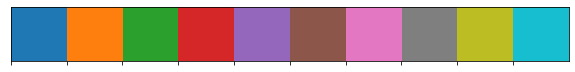

In [ ]:
import datetime as dt
from datetime import date, timedelta
import datetime
p=print
import pandas as pd
import copy
import time
import csv
from pandas.io.json import json_normalize
date_types = (
    pd.Timestamp,
    pd.DatetimeIndex,
    pd.Period,
    pd.PeriodIndex,
    dt.datetime,
    dt.time
)


today = datetime.date.today()
print ("Date   :", str(today))

one_day = datetime.timedelta(days=1)

yesterday = today - one_day

tomorrow = today + one_day
import fredapi
from fredapi import Fred
fred = Fred(api_key='b8d4b28e563c5b521d74b8d917aeb309')
import sklearn
import math
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import scipy.stats as scs
from scipy import integrate
from scipy.stats import t
from pandas.plotting import register_matplotlib_converters
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib as mpl
# import mplfinance as mpf
register_matplotlib_converters()
from matplotlib.dates import YearLocator, MonthLocator
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
from matplotlib import dates, ticker
# from matplotlib.finance import candlestick2_ochl
#from mplfinance import candlestick_ohlc
import matplotlib.dates as mdates
current_palette = sns.color_palette()
sns.palplot(current_palette)
import os
!pip install yfinance
import yfinance as yf 
yf.pdr_override()
!pip install chart_studio
import chart_studio
import chart_studio.plotly as pt
chart_studio.tools.set_config_file(world_readable=False, sharing='private')
import itertools
import plotly.graph_objects as go                           
import plotly.express as px
import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


In [ ]:
import sklearn.mixture as mix
from IPython.display import IFrame
import python_utils
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.graph_objs as go
# from dash.dependencies import Input, Output
from itertools import product
log = logging.getLogger(__name__)
import io
import os
import warnings
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
# from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import *
from itertools import accumulate
from sklearn import metrics
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import mixture as mix
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets
lr = LinearRegression()
from sklearn import preprocessing, svm, neighbors
from tqdm import tqdm
from setuptools import setup
import bs4 as bs
import urllib
import sys
import array
import time
from urllib.request import urlopen
from bs4 import BeautifulSoup
!pip install quandl
import quandl
import html
import requests
import json
!pip install django
import django 
# import tables as tb
import joblib
import seaborn as sns
#from mplfinance import candlestick_ohlc
def color_negative_red(value):
    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color
# H_result.style.applymap(color_negative_red, subset=['Diff','Sig'])
warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



     |████████████████████████████████| 1.4 MB 20.3 MB/s 
     |████████████████████████████████| 9.8 MB 28.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


     |████████████████████████████████| 7.9 MB 8.5 MB/s 


In [ ]:
tickers = ['TVIX', 'GLD', 'GDX', 'UUP', 'USO', 'RWR','XLF', 'XLP', 'XLK', 'XHB', 'ITB', 'KBE',
           'XLB', 'XLI', 'XLY', 'XLE', 'XLV', 'XLU','IYT', 'TLT','IWM','QQQ', 'SPY', 'XRT']  
end = tomorrow
#start = datetime.date(end.year-5,end.month,end.day)

import datetime
start=datetime.datetime.now() - datetime.timedelta(days=5*365)
#start = '2015-1-1'
##Get ticker info Daily
def get(tickers, startdate, enddate):
  
    def data(ticker):
        return (yf.download(ticker, start=start, end=end))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
	
df_long = get(tickers, start, end)
df_long = pd.DataFrame(df_long)
tickers=['TVIX', 'GLD', 'GDX', 'UUP', 'USO', 'RWR','XLF', 'XLP', 'XLK', 'XHB', 'ITB', 'KBE','XLB', 'XLI', 'XLY', 'XLE', 'XLV', 'XLU','IYT', 'TLT','IWM','QQQ', 'SPY', 'XRT'] 
end = tomorrow
# In[2]:
# os.chdir('d:/')
df_long['pct'] = np.log(df_long['Adj Close']/df_long['Adj Close'].shift(1))
df_long['DIFF'] = df_long['Adj Close'].diff()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
High = df_long['High']
High = pd.DataFrame(High)
High = High.unstack('Ticker')
High.columns = [tickers]
Low = df_long['Low']
Low = pd.DataFrame(Low)
Low = Low.unstack('Ticker')
Low.columns = [tickers]
Close =df_long['Adj Close']
Close = pd.DataFrame(Close)
Close = Close.unstack('Ticker')
Close.columns = [tickers]
Volume = df_long['Volume']
Volume = pd.DataFrame(Volume)
Volume = Volume.unstack('Ticker')
Volume.columns = [tickers]
Yield=Close.pct_change(9)
Yield=Yield.dropna()
#Yield = Yield*100
Yield=pd.DataFrame(Yield)
df=pd.DataFrame(Yield)
df_keys= pd.DataFrame()

SPYDER = yf.download('SPY', start=start, end=end)
QQQ = yf.download('QQQ', start=start, end=end)
IWM = yf.download('IWM', start=start, end=end)
VIX = yf.download('^VIX', start= start, end=end)
# end = tomorrow
# start = datetime.date(end.year-1,end.month,end.day)
SPY = yf.download('SPY', start=start, end=end)
XLE = yf.download('XLE', start=start,end=end)
ticker = ['TVIX', 'GLD', 'GDX', 'UUP', 'USO', 'RWR','XLF', 'XLP', 'XLK', 'XHB', 'ITB', 'KBE',
           'XLB', 'XLI', 'XLY', 'XLE', 'XLV', 'XLU','IYT', 'TLT','IWM','QQQ', 'SPY', 'XRT'] 
def zscore(series):
    return (series - series.mean()) / np.std(series)
zscore = zscore(Close)
zscore.columns=ticker
dat=copy.deepcopy(zscore)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
def average_true_range(High, Low, Close, n=14, fillna=False):
    """Average True Range (ATR)
    The indicator provide an indication of the degree of price volatility.
    Strong moves, in either direction, are often accompanied by large ranges,
    or large True Ranges.
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_true_range_atr
    Args:
        high(pandas.Series): dataset 'High' column.
        low(pandas.Series): dataset 'Low' column.
        close(pandas.Series): dataset 'Close' column.
        n(int): n period.
    Returns:
        pandas.Series: New feature generated.
    """
    cs = Close.shift(1)
    tr = High.combine(cs, max) - Low.combine(cs, min)

    atr = np.zeros(len(Close))
    atr[0] = tr[1::].mean()
    for i in range(1, len(atr)):
        atr[i] = (atr[i-1] * (n-1) + tr.iloc[i]) / float(n)

    atr = pd.Series(data=atr, index=tr.index)

    if fillna:
        atr = atr.replace([np.inf, -np.inf], np.nan).fillna(0)

    return pd.Series(atr, name='atr')
ATR = average_true_range(df_long.High, df_long.Low, df_long.Close, n=14)
df_long['ATR']=ATR

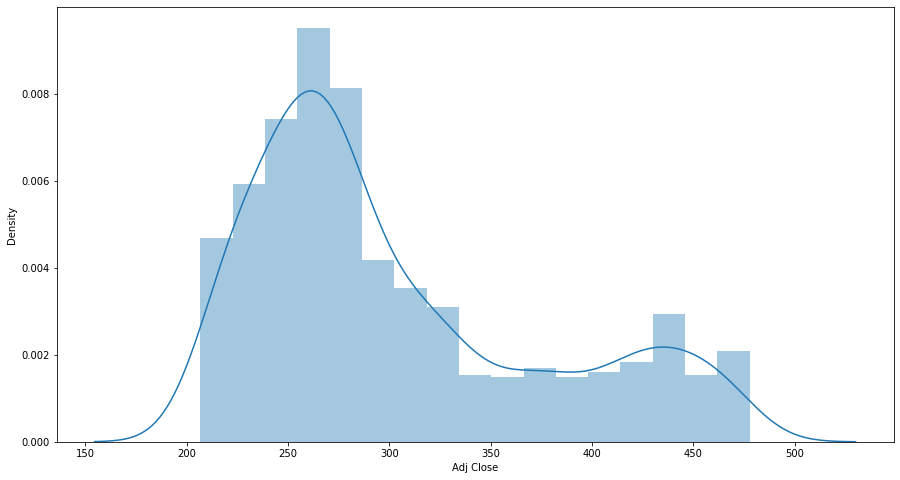

In [ ]:
window = 20
def calculate_return(df_long):
    df_long['DR'] = df_long['Close'] / df_long['Close'].shift(1)-1
    df_long['DPC'] = df_long["Close"].pct_change(1)
    df_long['DRC'] = (1 + df_long['DPC'].cumprod())
    df_long['min'] = df_long['Low'].rolling(window = window).min()
    df_long['mean'] = df_long['Close'].rolling(window = window).mean()
    df_long['std'] =  df_long['Close'].rolling(window = window).std()
    df_long['median'] =  df_long['Close'].rolling(window = window).median()
    df_long['max'] =  df_long['High'].rolling(window = window).max()
    df_long['ewma'] =  df_long['Close'].ewm(halflife = 0.5, 
                                            min_periods = window).mean()
    df_long['diff'] = df_long['Close'].diff(window)

    return df_long
    @property
    def _constructor(self):
        return df_long
    
df_long = calculate_return(df_long)
n=10 
def stochastic_oscillator_d(sym):

    df_long['L14'] = df_long['Low'].rolling(window=14).min()
#Create the "H14" column in the DataFrame
    df_long['H14'] = df_long['High'].rolling(window=14).max()
#Create the "%K" column in the DataFrame
    df_long['%K'] = 100*((df_long['Close'] - df_long['L14']) / (
        df_long['H14'] - df_long['L14']))
#Create the "%D" column in the DataFrame
    df_long['%D'] = df_long['%K'].rolling(window=3).mean()
    return df_long


def macd(df_long, n_fast, n_slow):

    EMAfast = df_long.Close.ewm(span=n_fast, min_periods=n_slow).mean()
    EMAslow = df_long.Close.ewm(span=n_slow, min_periods=n_slow).mean()
    df_long['MACD'] = (EMAfast - EMAslow)
    df_long['MACDsign'] = df_long['MACD'].ewm(span=9, min_periods=9).mean()
    df_long['MACDdiff'] = df_long['MACD'] - df_long['MACDsign']
    return df_long


def mass_index(sym):

    Range = df_long.High - df_long.Low
    EX1 = Range.ewm(span=9, min_periods=9).mean()
    EX2 = EX1.ewm(span=9, min_periods=9).mean()
    Mass = EX1 / EX2
    df_long['MassI'] = Mass.rolling(25).sum()

    return df_long
  


def true_strength_index(sym, r, s):
    M = (df_long['Close'].diff(1))
    aM = abs(M)
    EMA1 = pd.Series(M.ewm(span=r, min_periods=r).mean())
    aEMA1 = pd.Series(aM.ewm(span=r, min_periods=r).mean())
    EMA2 = pd.Series(EMA1.ewm(span=s, min_periods=s).mean())
    aEMA2 = pd.Series(aEMA1.ewm(span=s, min_periods=s).mean())
    df_long['TSI'] = (EMA2 / aEMA2)
   
    return df_long


def accumulation_distribution(sym, n):
    ad = (2 * df_long['Close'] - df_long['High'] - df_long['Low']) / (df_long['High'] - df_long['Low']) * df_long['Volume']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    df_long['AD'] = (ROC)
   
    return df_long


def chaikin_oscillator(df_long):
    ad = (2 * df_long['Close'] - df_long['High'] - df_long['Low']) / (df_long['High'] - df_long['Low']) * df_long['Volume']
    df_long['Chaikin'] = ad.ewm(span=3, min_periods=3).mean() - ad.ewm(span=10, min_periods=10).mean()
   
    return df_long


def force_index(df_long, n):
    df_long['FI'] = df_long['Close'].diff(n) * df_long['Volume'].diff(n)
    
    return df_long


def ease_of_movement(df_long, n):
    df_long['EoM'] = (df_long['High'].diff(1) + df_long['Low'].diff(1)) * (df_long['High'] - df_long['Low']) / (2 * df_long['Volume'])
    df_long['Eom_ma'] = df_long['EoM'].rolling(n, min_periods=n).mean()
    
    return df_long


def commodity_channel_index(df_long, n):
    PP = (df_long['High'] + df_long['Low'] + df_long['Close']) / 3
    df_long['CCI'] = (PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std()
    
    return df_long


def coppock_curve(df_long, n):
    M = df_long['Close'].diff(int(n * 11 / 10) - 1)
    N = df_long['Close'].shift(int(n * 11 / 10) - 1)
    ROC1 = M / N
    M = df_long['Close'].diff(int(n * 14 / 10) - 1)
    N = df_long['Close'].shift(int(n * 14 / 10) - 1)
    ROC2 = M / N
    df_long['Copp'] = (ROC1 + ROC2).ewm(span=n, min_periods=n).mean()
    return df_long


def keltner_channel(df_long, n):
    df_long['KelChM'] = ((df_long['High'] + df_long['Low'] + df_long['Close']) / 3).rolling(n, min_periods=n).mean()
    df_long['KelChU'] = ((4 * df_long['High'] - 2 * df_long['Low'] + df_long['Close']) / 3).rolling(n, min_periods=n).mean()
    df_long['KelChD'] = pd.Series((-2 * df_long['High'] + 4 * df_long['Low'] + df_long['Close']) / 3).rolling(n, min_periods=n).mean()
    return df_long


def standard_deviation(df_long, n):
    df_long['STD'] = (df_long['Close'].rolling(n, min_periods=n).std())
    return df_long
prices = df_long
n = 10
n_slow = 14
n_fast = 3
s =3
r = 10
mass_index(df_long)
macd(df_long, n_fast, n_slow)
standard_deviation(df_long, n)
true_strength_index(df_long, n, s)
accumulation_distribution(df_long, n)
chaikin_oscillator(df_long)
force_index(df_long, n)
ease_of_movement(df_long, n)
coppock_curve(df_long, n)
stochastic_oscillator_d(df_long)

df_long.columns   
df_long = calculate_return(df_long)

all_data = df_long.copy()
all_data = pd.DataFrame(all_data)

returns = np.log(Close/Close.shift(1)) 
returns =returns.unstack()
#returns.columns=ticker
# raw = pd.DataFrame()
# index = raw.index
# symbol = ('SP', 'SPY', 'NQ', 'QQQ', 'VIX', 'AAPL')
# raw.columns = raw.columns=[symbol]

# cols = [] 
# for symbol in raw: 
#     col = 'raw{}'.format(symbol) 
#     raw[col] = raw[symbol].shift(1)
#     cols.append(col)
# data = pd.DataFrame(raw[cols])
# data.unstack('Ticker')
def relative_strength(prices, n=14):
    
    deltas = np.diff(prices)
    seed = deltas[:n + 1]
    up = seed[seed >= 0].sum() / n
    down = -seed[seed < 0].sum() / n
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100. / (1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter

        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up * (n - 1) + upval) / n
        down = (down * (n - 1) + downval) / n

        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)

    return rsi

RSI = np.array(relative_strength(df_long['Close'], 14))
df_long['RSI'] = RSI
import seaborn as sns
# Distribution Plot (a.k.a. Histogram)

plt.figure(figsize=(15,8))
plt.tight_layout()

sns.distplot(SPYDER['Adj Close'])

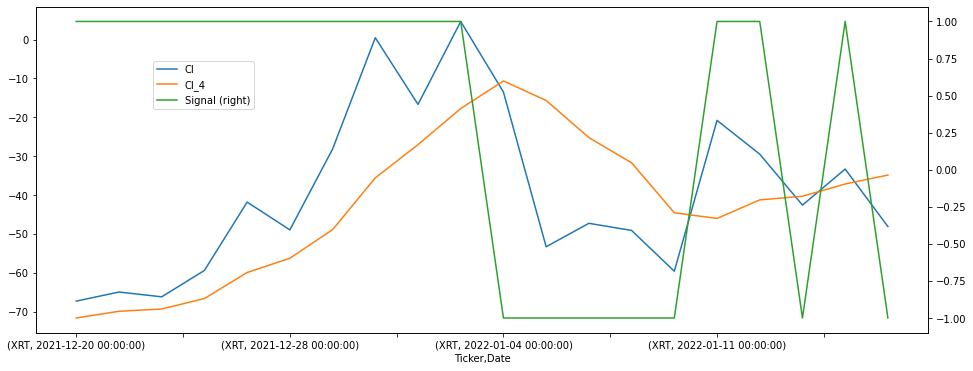

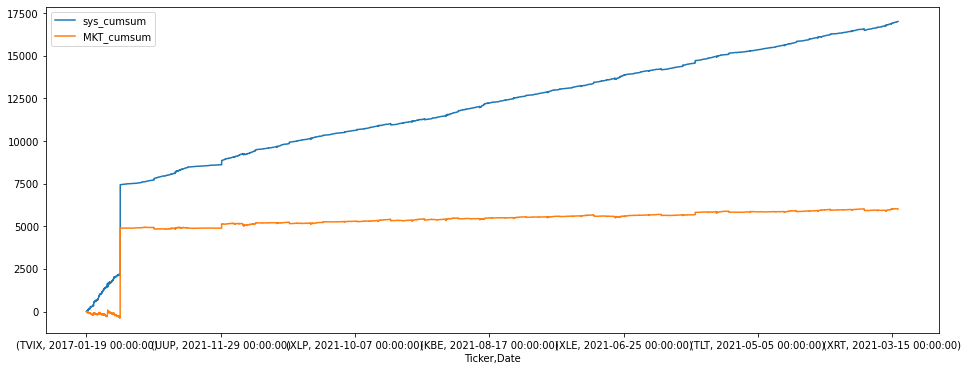

In [ ]:
def CI (sym, n):
    LL= df_long.Low.rolling(window=n).min()
    HH = df_long.High.rolling(window=n).max()
    Div = (HH - LL)/(LL+0.01)
    ROC = df_long.Close.pct_change(n) * 100
    return ROC/Div
CI = CI(df_long, 20)
df_long['CI'] = CI
df_long['CI_4'] = df_long['CI'].rolling(window = 5).mean()
df_long['CI']

df_long['Signal'] = np.where(df_long['CI'] > df_long['CI_4'], 1, -1)

ax = df_long[['CI', 'CI_4', 'Signal']][-20:].plot( figsize =(16, 6), 
                                                    secondary_y ='Signal') 
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
df_long['Signal'].value_counts()
df_long['Returns'] = (df_long['Close']-df_long['Close'].shift(1))/ df_long.Close.shift(1) *100
df_long['sys_rtrn'] = df_long['Signal']*df_long['Returns'].shift(1)
df_long['MKT_cumsum'] = df_long['Returns'].cumsum()
df_long['sys_cumsum']= df_long['sys_rtrn'].cumsum()
np.exp(df_long[['Returns', 'sys_rtrn']].sum())
df_long[['sys_cumsum', 'MKT_cumsum']].plot(figsize =(16, 6));

Sig_CI = pd.DataFrame(df_long['Signal'])
Sig_CI
#Sig_CI.columns=['VIX', 'GLD', 'GDX', 'UUP', 'USO', 'RWR','XLF', 'XLP', 'XLK', 'XHB', 'ITB', 'KBE', 'XLB', 'XLI', 'XLY', 'XLE', 'XLV', 'XLU','IYT', 'TLT','IWM','QQQ', 'SPY', 'XRT', "AAPL", "GOOG", "MSFT", "AMZN", "SNY", "VZ", "IBM", "HPQ", "QCOM", "NVDA"]

columns=['VIX', 'GLD', 'GDX', 'UUP', 'USO', 'RWR','XLF', 'XLP', 'XLK', 'XHB', 'ITB', 'KBE', 'XLB', 'XLI', 'XLY', 'XLE', 'XLV', 'XLU','IYT', 'TLT','IWM','QQQ', 'SPY', 'XRT', "AAPL", "GOOG", "MSFT", "AMZN", "SNY", "VZ", "IBM", "HPQ", 'QCOM', 'NVDA']

Sig_CI= Sig_CI.unstack("Ticker")

Sig_CI.columns=tickers
P_CI = Sig_CI[-5:]
P_CI.T
trades = pd.DataFrame(df_long)
trades['Signal'] = (df_long['Signal'])
trades
pivot_df = pd.pivot_table(trades,index=["Date","Ticker"])
temp = pivot_df
pivot_df
data = trades
#Create a column in the DataFrame showing "TRUE" if sell entry signal is given and "FALSE" otherwise. 
#A sell is initiated when the %K line crosses down through the %D line and the value of the oscillator is above 80 
data['Sell_Entry'] = (data['CI'] < data['CI_4']) & (data['CI'].shift(1) > data['CI_4'].shift(1)) #& (data['CI'] > 80) 
#Create a column in the DataFrame showing "TRUE" if sell exit signal is given and "FALSE" otherwise. 
#A sell exit signal is given when the %K line crosses back up through the %D line 
data['Sell_Exit'] = ((data['CI'] > data['CI_4']) & (data['CI'].shift(1) < data['CI_4'].shift(1))) 
#create a placeholder column to populate with short MPs (-1 for short and 0 for flat) using boolean values created above 
data['Short'] = np.nan
#data = data.fillna('0.0')
data.loc[data['Sell_Entry'],'Short'] = -1.0
data.loc[data['Sell_Exit'],'Short'] = 0.0
#Set initial MP on day 1 to flat 
data['Short'][0] = 0.0
#Forward fill the MP column to represent the holding of MPs through time 
data['Short'] = data['Short'].fillna(method='pad') 
#Create a column in the DataFrame showing "TRUE" if buy entry signal is given and "FALSE" otherwise. 
#A buy is initiated when the %K line crosses up through the %D line and the value of the oscillator is below 20 
data['Buy_Entry'] = ((data['CI'] > data['CI_4']) & (data['CI'].shift(1) < data['CI_4'].shift(1))) #& (data['rs_MA3_ind'] < 50) 
#Create a column in the DataFrame showing "TRUE" if buy exit signal is given and "FALSE" otherwise. 
#A buy exit signal is given when the %K line crosses back down through the %D line 
data['Buy_Exit'] = ((data['CI'] < data['CI_4']) & (data['CI'].shift(1) > data['CI_4'].shift(1))) 
#create a placeholder column to polulate with long MPs (1 for long and 0 for flat) using boolean values created above 
data['Long'] = np.nan  
data.loc[data['Buy_Entry'],'Long'] = 1.0 
data.loc[data['Buy_Exit'],'Long'] = 0.0 
#Set initial MP on day 1 to flat 
data['Long'][0] = 0.0
#Forward fill the MP column to represent the holding of MPs through time 
data['Long'] = data['Long'].fillna(method='pad') 
#Add Long and Short MPs together to get final strategy MP (1 for long, -1 for short and 0 for flat) 
# print(data['Long'])
# print(data['Short'])
#data[-252:].plot(figsize =(16, 8))
data['Sig_CI'] =(data['Long'] + data['Short'])

data['Trade_Sig'] = np.where(data['Sig_CI'] > 0, "Buy/Cover", "Flat/Hold")
data['Trade_Sig'] = np.where(data['Sig_CI'] < 0, "Sell/Short", data['Trade_Sig'])
CI=pd.DataFrame(data)

In [ ]:
Sig_CI = pd.DataFrame(CI['Sig_CI'])
Sig_CI 

Sig_CI
Ticker Date              
TVIX   2017-01-19     0.0
       2017-01-20     0.0
       2017-01-23     0.0
       2017-01-24     0.0
       2017-01-25     0.0
...                   ...
XRT    2022-01-11     1.0
       2022-01-12     1.0
       2022-01-13    -1.0
       2022-01-14     1.0
       2022-01-18    -1.0

[30215 rows x 1 columns]

In [ ]:
# Sig_CI=Sig_CI.swaplevel(0,1)
# Sig_CI=Sig_CI.stack()
# CI = Sig_CI[-24:]

In [ ]:
CI=Sig_CI

In [ ]:
Sig_CI=Sig_CI.unstack()
Sig_CI.columns=tickers

ValueError: ignored

In [ ]:
CI = CI.reset_index()

# Bollinger Band

In [ ]:
clf = neighbors.KNeighborsClassifier()
lab_enc = preprocessing.LabelEncoder()
df_long['DIFF'] = df_long['Adj Close'].diff()

BB=pd.DataFrame(df_long)
BB['MA_20'] = BB.Close.rolling(window=20).mean()
BB['STD_20'] = BB.Close.rolling(window=20).std()
BB['UB'] = BB['MA_20'] + (BB['STD_20'] * 2)
BB['LB'] = BB['MA_20'] - (BB['STD_20'] * 2)

df_long['DIFF'] = df_long['Adj Close'].diff()
#bollinger bands is a simple indicator
#just moving average plus moving standard deviation
#but pattern recognition is a differenct case
#visualization is easy for human to identify the pattern
#but for the machines, we gotta find a different approach
#when we talk about pattern recognition these days
#people always respond with machine learning
#why machine learning when u can use arithmetic approach 
#which is much faster and simpler?

#there are many patterns for recognition
#top m, bottom w, head-shoulder top, head-shoulder bottom, elliott waves
#in this content, we only discuss bottom w
#top m is just the reverse of bottom w
#rules of bollinger bands and bottom w can be found in the following link:


import os
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np

#first step is to calculate moving average and moving standard deviation
#we plus/minus two standard deviations on moving average
#we get our upper, mid, lower bands
def bollinger_bands(df):
    
    data=copy.deepcopy(df2)
    data['std']=data['Close'].rolling(window=20,min_periods=20).std()
    data['mid band']=data['Close'].rolling(window=20,min_periods=20).mean()
    data['upper band']=data['mid band']+2*data['std']
    data['lower band']=data['mid band']-2*data['std']
    
    return data

ticker = ['VIX', 'GLD', 'GDX', 'UUP', 'USO', 'RWR','XLF', 'XLP', 'XLK', 'XHB', 'ITB', 'KBE',
           'XLB', 'XLI', 'XLY', 'XLE', 'XLV', 'XLU','IYT', 'TLT','IWM','QQQ', 'SPY', 'XRT'] 

BB['BOL'] = 1 + ((BB['Close']-BB['MA_20']) + (2*BB['STD_20']))/(4*BB['STD_20'])
Sect2BOL = df_long.loc['SPY']
Sect2BOL['STD_20'] = Sect2BOL['Close'].rolling(window=20).std()

SEC2 = 1+ ((Sect2BOL['Close'] - Sect2BOL['MA_20']) + (2*Sect2BOL['STD_20']))/(4*Sect2BOL['STD_20'])
BB['Sect_ID'] = SEC2- BB['BOL']
BB['Div'] = BB['Sect_ID'] / BB['BOL'] *100

BB['Div_Signal'] = np.where(BB['Div'] > 5, 1, 0)
BB['Div_Signal'] = np.where(BB['Div'] < 5, -1, BB['Div_Signal'])
#BB['DIV_Signal'] = np.sign(BB['Div'])
df_long['Div_Signal'] = BB['Div_Signal']

BB['Trade_ID'] = np.where(BB['Div_Signal'] > 0, "Buy/Cover", "Flat/Hold")
BB['Trade_ID'] = np.where(BB['Div_Signal'] < 0, "Sell/Short", BB['Trade_ID'])

DIV_Signal = BB['Div_Signal']
BB['PPS'] = BB['Div_Signal'] * BB['DIFF']
df_long['PPS'] = BB['PPS'].copy()

Div_Signal = BB['Div_Signal']
df_long['Div'] = BB['Div']
df_long['Div_Signal']
df_long['Returns_All'] = df_long['Adj Close'].pct_change()*100

df_long['BB_Trade_ID'] = BB['Trade_ID']
Portfolio_1 = pd.DataFrame()
Portfolio_1 = df_long[['Div_Signal', 'Returns_All', 'DIFF', 'BB_Trade_ID', 'Adj Close', 'PPS', 'Div']]

Portfolio_1 = Portfolio_1.round(2)
Portfolio = Portfolio_1.swaplevel('Ticker', 'Date')
Portfolio = Portfolio_1.groupby(['Date'])

Portfolio = Portfolio.apply(lambda _df: _df.sort_values(by=['Date']))
Portfolio = Portfolio_1.groupby(['Date'])

Portfolio = Portfolio.apply(lambda _df: _df.sort_values(by=['Date']))
Portfolio.index = Portfolio.index.droplevel(-1)

df_long['Returns_All'] = df_long['Adj Close'].pct_change()*100
df_long['DIFF'] = df_long['Adj Close'].diff()
df_long['BB_Trade_ID'] = BB['Trade_ID']
Portfolio_1 = pd.DataFrame()
Portfolio_1 = df_long[['Div_Signal', 'Returns_All', 'DIFF', 'PPS','BB_Trade_ID', 'Adj Close']]

Portfolio_1 = Portfolio_1.round(2)

Portfolio = Portfolio_1.swaplevel('Ticker', 'Date')
Portfolio = Portfolio_1.groupby(['Date'])

Portfolio = Portfolio.apply(lambda _df: _df.sort_values(by=['Date']))
Portfolio = Portfolio_1.groupby(['Date'])

Portfolio = Portfolio.apply(lambda _df: _df.sort_values(by=['Date']))
Portfolio.index = Portfolio.index.droplevel(-1)

Portfolio[-24:].style.applymap(color_negative_red, subset=['DIV_Signal', 'Returns_ALL', 'DIFF', 'profit','PPS'])

Div = pd.DataFrame()
Div['Div'] = BB['Div']
Div['Diff'] = df_long['DIFF']
n=20
def IMO(indicator):
    LL_200 = indicator.rolling(window=n).min()
    HH_200 = indicator.rolling(window=n).max()
    return (indicator - LL_200)*100/ (HH_200-LL_200)
IMO_ID = IMO(Div['Div'])

Div['Signal'] =  IMO_ID
Div['Signal_4'] = np.round(Div['Signal'].rolling(window = 5, center = False).mean(), 2)
Div['ID_sig'] = Div['Signal'] - Div['Signal_4'] 
#Sig_ID = Sig_ID - IMO_ID_5.rename(columns=dict(zip(Sig_ID.columns, IMO_ID_5.columns)))

df_long['Signal_ID'] = Div['ID_sig'].copy

Div['Position'] = np.sign(Div['ID_sig'])
Div['Div_Signal'] = BB['Div_Signal']
Div['Close'] = df_long['Adj Close']

print(Div)

Div['Diff'] = df_long['Adj Close'].diff(1)
Div['Close'] = df_long['Adj Close']

trades = pd.DataFrame(Div)
trades['Signal'] = (Div['Signal'])
trades
pivot_df = pd.pivot_table(trades,index=["Date","Ticker"])
temp = pivot_df
pivot_df
data = trades
#Create a column in the DataFrame showing "TRUE" if sell entry signal is given and "FALSE" otherwise. 
#A sell is initiated when the %K line crosses down through the %D line and the value of the oscillator is above 80 
data['Sell_Entry'] = (data['Signal'] < 80) & (data['Signal'].shift(1) >80 ) #& (data['Signal'] > 80) 
#Create a column in the DataFrame showing "TRUE" if sell exit signal is given and "FALSE" otherwise. 
#A sell exit signal is given when the %K line crosses back up through the %D line 
data['Sell_Exit'] = data['Signal']> 80
data['Sell_Exit'] = (Div['ID_sig'] > 0)
#create a placeholder column to populate with short MPs (-1 for short and 0 for flat) using boolean values created above 
data['Short'] = np.nan
#data = data.fillna('0.0')
data.loc[data['Sell_Entry'],'Short'] = -1.0
data.loc[data['Sell_Exit'],'Short'] = 0.0
#Set initial MP on day 1 to flat 
data['Short'][0] = 0.0
#Forward fill the MP column to represent the holding of MPs through time 
data['Short'] = data['Short'].fillna(method='pad') 
#Create a column in the DataFrame showing "TRUE" if buy entry signal is given and "FALSE" otherwise. 
#A buy is initiated when the %K line crosses up through the %D line and the value of the oscillator is below 20 
data['Buy_Entry'] = ((data['Signal'] > 20) & (data['Signal'].shift(1) < 20))#& (data['rs_MA3_ind'] < 50) 
#Create a column in the DataFrame showing "TRUE" if buy exit signal is given and "FALSE" otherwise. 
#A buy exit signal is given when the %K line crosses back down through the %D line 
data['Buy_Exit'] = data['Signal'] <20
data['Buy_Exit'] = (Div['ID_sig'] < 0) 
#create a placeholder column to polulate with long MPs (1 for long and 0 for flat) using boolean values created above 
data['Long'] = np.nan  
data.loc[data['Buy_Entry'],'Long'] = 1.0 
data.loc[data['Buy_Exit'],'Long'] = 0.0 
#Set initial MP on day 1 to flat 
data['Long'][0] = 0.0
#Forward fill the MP column to represent the holding of MPs through time 
data['Long'] = data['Long'].fillna(method='pad') 
#Add Long and Short MPs together to get final strategy MP (1 for long, -1 for short and 0 for flat) 
# print(data['Long'])
# print(data['Short'])
#data[-252:].plot(figsize =(16, 8))
data['Sig_Signal'] =(data['Long'] + data['Short'])
data['Trade_Sig'] = np.where(data['Sig_Signal'] > 0, "Buy/Cover", "Flat/Hold")
data['Trade_Sig'] = np.where(data['Sig_Signal'] < 0, "Sell/Short", data['Trade_Sig'])
data['PPS'] = data['Sig_Signal'] * data['Diff']

data = data.swaplevel('Ticker', 'Date')
data = data.groupby(['Date'])

data = data.apply(lambda _df: _df.sort_values(by=['Date']))
data = data.droplevel(0, axis=0)
# 

df = data[['Close', 'PPS', 'Trade_Sig', 'Diff', 'Short', 'Long', 'Sig_Signal']].copy()
df=df.round(2)
df[-24:]
cash = 1000000
print("Starting Cash in Portfolio $" + str(cash))
port_value = 0.1
print("Max proportion of portfolio bet on any trade, 10%")
price = df['Close']
Ticker = 1
df['batch'] = cash*port_value/price 
print("Number of shares bought per batch")
print("PPS = Profit Per Share")
stoploss = .1    
print("% of trade loss that would trigger a stoploss: 10%")
df['share_profit'] = df['PPS']
df['batches']= np.floor(cash * port_value) // np.ceil(df['batch'] * price) # Maximum number of batches of stocks invested in
df['profit'] = df['share_profit'] * df['batches'] * df['batch']
df['Trade_Value'] = df['Close'] * df['batches'] * df['batch']
df=df.round(2)
df['T_Profit'] =df['profit'] + cash
df['T_Profit'] = df['T_Profit'].cumsum()
df=df.round(2)
df=df.drop('batches', axis=1)
df_ID = pd.DataFrame(df)
df[-24:].style.applymap(color_negative_red, subset=['PPS', 'Sig_Signal','T_Profit', 'profit'])

                         Div        Diff  ...  Div_Signal        Close
Ticker Date                               ...                         
TVIX   2017-01-19        NaN         NaN  ...           0  6720.000000
       2017-01-20        NaN -510.000000  ...           0  6210.000000
       2017-01-23        NaN -110.000000  ...           0  6100.000000
       2017-01-24        NaN -580.000000  ...           0  5520.000000
       2017-01-25        NaN -260.000000  ...           0  5260.000000
...                      ...         ...  ...         ...          ...
XRT    2022-01-11  17.270052    1.440002  ...           1    87.180000
       2022-01-12  31.181401   -1.010002  ...           1    86.169998
       2022-01-13  16.207039   -0.750000  ...           1    85.419998
       2022-01-14  33.979007   -1.790001  ...           1    83.629997
       2022-01-18  11.633398   -1.589996  ...           1    82.040001

[30215 rows x 8 columns]
Starting Cash in Portfolio $1000000
Max proportion 

In [ ]:
data['Sell_Exit']


# ## DS

Close=df_long['Adj Close']
Close = Close.unstack('Ticker')
Close.columns = ticker

MA_20 = BB['MA_20']
MA_20 = MA_20.unstack('Ticker')
MA_20 = pd.DataFrame(MA_20)
MA_20.columns = ticker
STD_20 = BB['STD_20']
STD_20 = STD_20.unstack('Ticker')
STD_20 = pd.DataFrame(STD_20)
STD_20.columns= ticker
UB = BB['UB']
UB = UB.unstack('Ticker')
UB = pd.DataFrame(UB)
UB.columns= ticker
LB = BB['LB']
LB = LB.unstack('Ticker')
LB = pd.DataFrame(LB)
LB.columns= ticker
BOL = BB['BOL']
BOL = BOL.unstack('Ticker')
BOL = pd.DataFrame(BOL)
BOL.columns= ticker

DS1 = pd.DataFrame()
DS2 = pd.DataFrame()
DS1 = (Close - MA_20)/MA_20 * 100
DS = pd.DataFrame(DS1)
DS2 = DS1['SPY']
DS1 = DS1.drop('SPY', axis=1)
Sect_return = Close.apply(lambda x: x / x[0])
Sect_return.head() - 1
Sect_return_apr = Sect_return * 20 * 100    # There are 252 trading days in a year; the 100 converts to percentages
Sect_return_apr.tail()
DS_corr = Sect_return_apr.drop("SPY", 1).corrwith(Sect_return_apr.SPY)    # Since RRF is constant it doesn't change the
                                                                         # correlation so we can ignore it in our
DS_corr_20 = pd.DataFrame()
DS_corr_20 = Close[Close.columns[0:]].apply(lambda x: x.rolling(20).corr(Close['SPY']))
DS_corr_20.dropna()

# DS = BB['DS']
# DS = pd.DataFrame(DS)

BB['DS'] = (((BB['Close']- BB['MA_20'])/BB['MA_20'])* 100)
BB['Returns'] = (BB['Close'] - BB['Close'].shift(1)) / BB['Close'].shift(1) *100

DS =BB['DS'].unstack('Ticker')
DS.columns = ticker

DS = DS.dropna()
DS=DS.round(2)

ID = BB['DS'].apply(lambda x: x - DS['SPY'])
#BB['ID'] = ID.copy()
ID = ID.copy()

Corr = pd.DataFrame(DS_corr_20)

DS = BB['DS']
DS = pd.DataFrame(DS)

DS2 = BB.loc['SPY']['DS']
ID = DS.apply(lambda x: x - x['SPY'])
BB['ID'] = ID.copy()
ID = ID.copy()

In [ ]:
Portfolio = Portfolio_1.swaplevel('Ticker', 'Date')
Portfolio = Portfolio_1.groupby(['Date'])
Portfolio = Portfolio.apply(lambda _df: _df.sort_values(by=['Date']))
Returns = Portfolio['Returns_All']
Trade_ID = BB['Trade_ID']
DIV_Signal = Trade_ID.unstack('Ticker')
DIV_Signal = pd.DataFrame(DIV_Signal)
DIV_Signal.columns = [ticker]
Trade_ID = Trade_ID.unstack('Ticker')
Trade_ID = pd.DataFrame(Trade_ID)
#Trade_ID.columns = [ticker]
df = BB[['Div_Signal', 'Trade_ID']]

Signal_ID = ID * Corr
Signal_ID = pd.DataFrame(Signal_ID)
n=20

def IMO(indicator):
    LL_200 = indicator.rolling(window=n).min()
    HH_200 = indicator.rolling(window=n).max()
    return (indicator - LL_200)*100/ (HH_200-LL_200)

IMO_ID = IMO(Signal_ID)
Sig_ID = IMO_ID
IMO_ID_5 = np.round(IMO_ID.rolling(window = 5, center = False).mean(), 2)
# ID_sig = IMO_ID - IMO_ID_5
Sig_ID = Sig_ID - IMO_ID_5.rename(columns=dict(zip(Sig_ID.columns, IMO_ID_5.columns)))
Sig_ID = pd.DataFrame(Sig_ID)
df_long['Signal_ID'] = Sig_ID.copy
df = df.groupby(['Date'])
df = df.apply(lambda _df: _df.sort_values(by=['Date']))
Close = df_long.Close.copy()
Close = Close.unstack('Ticker')
Close.columns=[ticker]
change = Close.apply(lambda x: np.log(x) - np.log(x.shift(1))) *100
#SYS_re = change * Trade_ID
Temp_pos = DIV_Signal[-5:]

In [ ]:
Sector = ['Volatility', 'Nasdaq', 'Small Caps', 'Long Bonds', 'Transports', 'Utilities', 'Health Care', 'Energy', 'Discretionary', 'Industrials', 'Materials', 'Banks', 'Construction', 'Home Builders', 'SP Tech', 'Staples', 'Financials', 'REIT', 'Oil', 'USD', 'Gold Stocks', 'Gold Bul', 'S&P', 'Retail']

Portfolio = Portfolio.droplevel(level=-1)

Portfolio[-24:].style.applymap(color_negative_red, subset=['DIV_Signal', 'Returns_ALL', 'DIFF', 'profit','PPS'])

In [ ]:
Portfolio_temp=Portfolio[-24:]

In [ ]:
Portfolio_temp=Portfolio_temp.droplevel('Date', axis=0)
Portfolio=Portfolio.round(2)

In [ ]:
P = Portfolio_temp.style.applymap(color_negative_red, subset=['PPS', 'Sig_CI', 'T_Profit', 'profit'])

In [ ]:
CI=CI.stack()


In [ ]:
trades = pd.DataFrame(df_long)
trades['Signal'] = (df_long['Signal'])
trades
pivot_df = pd.pivot_table(trades,index=["Date","Ticker"])

In [ ]:
temp_CI=pivot_df
temp_CI=pd.DataFrame(temp_CI)

In [ ]:
temp_CI=temp_CI[-24:]
# temp_CI.columns = temp_CI.columns.droplevel()
temp_CI=temp_CI.droplevel(0, axis=0)

In [ ]:
temp_CI=temp_CI['Signal']
temp_CI
temp_CI.columns=('Signal')

In [ ]:
a=df_ID[-24:]
#df_ID[-24:].style.applymap(color_negative_red, subset=['PPS', 'Sig_Signal','T_Profit', 'profit','Diff', 'share_profit', 'Short', 'Long'])


In [ ]:
df_ID=df_ID[-24:]

df_ID=df_ID.reset_index()

df_ID=df_ID.set_index('Ticker')

In [ ]:
Portfolio_temp['Sig_Signal']=df_ID['Sig_Signal']

In [ ]:
temp_CI=temp_CI.reset_index()
temp_CI=temp_CI.set_index('Ticker')

In [ ]:
Portfolio_temp['Signal2']=temp_CI['Signal']

In [ ]:
Port= pd.DataFrame()
Pc = Sector[-24:]
Port['Close'] = Portfolio_temp['Adj Close']
Port['Signal1'] = Portfolio_temp['Div_Signal']
Port['Signal2'] = Portfolio_temp['Signal2']
Port['Signal3']=df_ID['Sig_Signal']
Port['Trade_CI'] = np.where(Port['Signal2'] >0, "Buy/Cover", "Flat/Hold")
Port['Trade_CI'] = np.where(Port['Signal2'] < 0, "Sell/Short", Port['Trade_CI'])
Port['DIFF'] = Portfolio_temp['DIFF']
Sig = Port[['Signal1', 'Signal2', 'Signal3']]
sign = Sig.T

In [ ]:
sign=sign.T
sign['Multiplier'] = sign.sum(axis=1)

In [ ]:
Port['Sum'] = (Sig['Signal1'])+(Sig['Signal2'])+(Sig['Signal3'])

Port['PPS'] = Port['Sum'] * Port['DIFF']

Port['Multiplier'] = (Port.Sum.round(2))
Port=Port.round(2)
Port['Sectors'] = ['Volatility', 'Nasdaq', 'Small Caps', 'Long Bonds', 'Transports', 'Utilities', 'Health Care', 'Energy', 'Discretionary', 'Industrials', 'Materials', 'Banks', 'Construction', 'Home Builders', 'SP Tech', 'Staples', 'Financials', 'REIT', 'Oil', 'USD', 'Gold Stocks', 'Gold Bul', 'S&P', 'Retail']

Port['MAIN_Trade_Signal'] = np.where(Port.Sum == 1, 'Buy','Flat')
Port['MAIN_Trade_Signal'] = np.where(Port.Sum == 2, 'Strong Buy',Port['MAIN_Trade_Signal'])
Port['MAIN_Trade_Signal'] = np.where(Port.Sum == 3, 'Conviction Buy',Port['MAIN_Trade_Signal'])
Port['MAIN_Trade_Signal'] = np.where(Port.Sum == -1, 'Sell',Port['MAIN_Trade_Signal'])
Port['MAIN_Trade_Signal'] = np.where(Port.Sum == -2, 'Strong Sell',Port['MAIN_Trade_Signal'])
Port['MAIN_Trade_Signal'] = np.where(Port.Sum == -3, 'Conviction Sell',Port['MAIN_Trade_Signal'])
Sum2 = pd.DataFrame(Port)

In [ ]:

from datetime import datetime
from datetime import datetime

now = datetime.now()
Close_min = pd.DataFrame(Close)
Close__min=Close_min.round(2)
current_time = now.strftime("%H-%M-%S")
print("Current Time =", current_time)
now = datetime.now().time() # time object
fname_min = 'Trade_Min_Signals-{}.csv'.format(current_time)
print("now =", now)
print("type(now) =", type(now))
with open(fname_min, "wb") as csv_file:
    myfile = csv.writer(open(fname_min, "w")) 
Close_min.to_csv(fname_min, index=True, index_label='Date', encoding='utf-8')

In [ ]:
Close_min

In [ ]:
import csv
import datetime
fname = 'Trade_Signals-{}.csv'.format(datetime.datetime.today().strftime('%Y-%m-%d'))
with open(fname, "wb") as csv_file:
    myfile = csv.writer(open(fname, "w")) 
Port.to_csv(fname, index=True, index_label='Date', encoding='utf-8')
with open(fname, newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)
df = pd.read_csv(fname)# Load the saved data

In [ ]:
df = pd.read_csv(fname)# Load the saved data

Port['MAIN_Trade_Signal'].value_counts()

Port = Port[-24:]

Port = Port.round(2)

ticker

cols = Port.columns.tolist()
cols = cols[-1:] + cols[:-1]
Port = Port.loc[:, cols]

cols = cols[-1:] + cols[:-1]
Port = Port.loc[:, cols]

In [ ]:
P = Port.style.applymap(color_negative_red, subset=['Close', 'Signal1','Signal2', 'Signal3','Sum','DIFF','PPS'])
S = pd.DataFrame()
S=Port[['Sectors', 'MAIN_Trade_Signal','Close', 'DIFF','PPS','Multiplier']]
S.style.applymap(color_negative_red, subset=['Close', 'DIFF','PPS', 'Closing Price','Multiplier'])

In [ ]:
# jupyter nbconvert --to pdf --execute --allow-errors notebook.ipynb

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$(document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')